# Исследование исторических данных о продаже игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Цель исследования:** выявить определяющие успешность игры закономерности.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

Загрузим нужные в ходе исследования библиотеки.

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучим общую информацию о датафрейме:
- Общий объём данных - 16715 строк.
- У значений в столбце 'year_of_release' тип данных - float64.
- У значений в столбце 'user_score' тип данных - object.

In [5]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Найдём количество пропусков в столбцах, чтобы определить наличие малого количества пропусков, которые не отображаются в процентных соотношениях. Можно заметить по 2 пропуска в столбцах 'Name' и 'Genre'.

Изучим количество пропусков в данных. В некоторых столбцах присутствуют пропуски. \
Большое количество пропусков можно увидеть в столбцах 'critic_score', 'user_score' и 'rating'. \
Небольшое количество пропусков в столбце 'year_of_release'.

**Таким образом, мы:**
- изучили общую информацию о данных (объём, тип данных, количество пропусков)

### Подготовьте данные

**1) Приведём названия столбцов к нижнему регистру**

In [7]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**2) Преобразуем типы данных**

Тип данных в столбце 'year_of_release' нужно преобразовать из вещественных чисел в целые, т.к. год - всегда целочисленное значение, но из-за пропусков это невозможно. Преобразуем тип данных после заполнения или удаления пропущенных значений

Тип данных в столбце 'user_score' нужно преобразовать из строк в вещественные числа, т.к. оценки пользователей - это числа, но в столбце присутствуют строки, не содержащие в себе численные значения, поэтому преобразование возможно только после преобразования или удаления этих строк.

**3) Обработаем пропуски**

In [8]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])

В столбцах 'name' и 'genre' есть небольшое количество пропусков. Заменить их логически невозможно. Удалим их, т.к. это не повлияет на исследование из-за их малого количества.

In [9]:
data = data.dropna(subset=['year_of_release'])

В столбце 'year_of_release' есть небольшое количество пропусков - 2%. Заменить их логически невозможно. Удалим их, т.к. их не больше 5% от всех значений, и это не сильно повлияет на исследование.

In [10]:
data['year_of_release'] = data['year_of_release'].apply(int)

Так как мы устранили пропуски в столбце 'year_of_release', мы можем преобразовать тип данных в этом столбце.

В столбцах 'critic_score', 'user_score' и 'rating' присутствует большое количество пропусков - 40%-51%. Удалить такое большое количество данных невозможно, логически заменить их нельзя.\
Оставим данные без изменений в столбцах 'critic_score' и 'user_score'. В столбце 'rating' заменим пропуски на 'unknown'.

In [11]:
data['rating'] = data['rating'].fillna('unknown')

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Рассмотрим столбец 'user_score'.

In [13]:
data.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

В столбц 'user_score' присутствуют значения 'tbd' - 'to be determined' - "будет определено". Это значение равнозначно пропуску, поэтому заменим эти значения на пропуски.

In [15]:
data['user_score'] = data['user_score'].apply('float64')

Так как мы преобразовали строки в столбце 'user_score' в пропуски, оставшиеся значения мы можем перевести в тип данных 'float'.

In [16]:
data.duplicated().sum()

0

Проверим данные на наличие дубликатов. Дубликаты отсутствуют.

**4) Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец**

In [17]:
data['na_sales_total'] = data['na_sales'].sum()

Найдём общее количество продаж в Северной Америке.

In [18]:
data['eu_sales_total'] = data['eu_sales'].sum()

Найдём общее количество продаж в Европе.

In [19]:
data['jp_sales_total'] = data['jp_sales'].sum()

Найдём общее количество продаж в Японии.

In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Добавим в data новый столбец 'total_sales' - количество общих продаж.

**Таким образом, мы:**
- переименовали столбцы для более удобного пользования
- преобразовали/удалили некорректные значения
- преобразовали типы данных
- обработали пропуски
- создали столбец со значениями суммарных продаж во всех регионах для дальнейшего исследования

### Проведите исследовательский анализ данных

**1) Посмотрим, сколько игр выпускалось в разные годы**

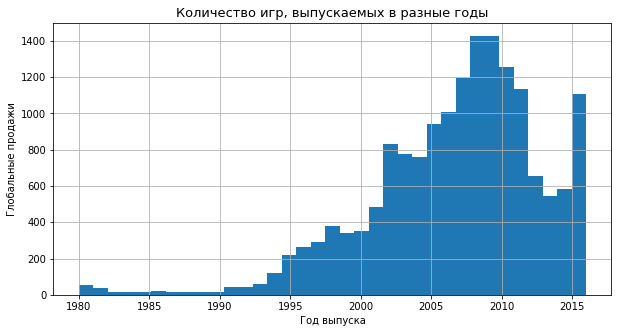

In [21]:
plt.figure(figsize=(10,5))
data['year_of_release'].hist(bins=35);
plt.title('Количество игр, выпускаемых в разные годы', fontsize=13)
plt.xlabel('Год выпуска', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10);

In [22]:
len(data['year_of_release'].unique())

37

Найдём количество лет в периоде, за который у нас имеются данные.

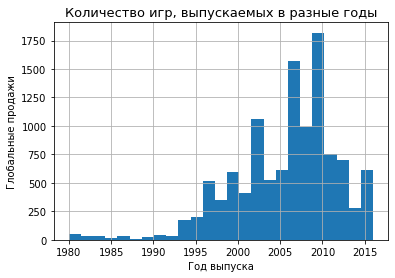

In [23]:
data_unique_name = data
data_unique_name = data_unique_name.drop_duplicates(subset=['name'], keep='first')

data_unique_name.pivot_table(index='name', values=['year_of_release']).hist(bins=25)
plt.title('Количество игр, выпускаемых в разные годы', fontsize=13)
plt.xlabel('Год выпуска', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10);

В 90-е годы выпускалось относительно мало игр. Затем их количество начинает постепенно расти и в конце 00-х годов количество игр достигает пика. \
Пик значений приходится на 2007-2010 годы.\
После 2010 года количество игр снижается.

В 1980-1990 годы выпускалось относительно очень мало игр. Начиная с 1990 года их количество начинает постепенно расти. в 00-х годах количество игр растёт большими темпами. \
Пики значений приходится на 2007-2010 и 2015 годы. \
В 2015 году количество игр резко возросло по сравнению с предыдущими годами.

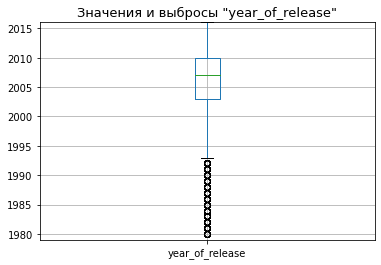

In [24]:
plt.title('Значения и выбросы "year_of_release"', fontsize=13)
plt.ylim(1979, 2016)
plt.xlim(0, 2)
data.pivot_table(index=data.index, values='year_of_release').boxplot();

In [25]:
data.pivot_table(index=data.index, values='year_of_release').describe()

,year_of_release
count,16444.000000
mean,2006.486256
std,5.875525
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2016.000000


Рассмотрим диаграмму размаха и список характерных значений столбца 'year_of_release'.\

1) найдем межквартильный размах: (75% - 25%) * 1,5 = (2010 - 2003) * 1,5 = 10,5
2) Найдём значение 0%: 25% - 10,5 = 2003 - 10,5 = 1992,5 - граница нормального размаха. Значения ниже её - выбросы.

In [26]:
data.loc[data['year_of_release'] < 1992, 'year_of_release'].count()

262

Посчитаем количество игр, выпущенных до 1992 года - 262 игры за 11 лет - примерно 1,6% от всех данных.

In [27]:
data = data.query('year_of_release >= 1992')

Удалим редкие значения количества игр, выпущенных до 1992 года. Данные за этот период не очень важны для исследования, т.к. данных слишком мало для того, чтобы можно было выявить какие-либо закономерности и сделать выводы.

**2) Посмотрим, как менялись продажи по платформам.**

In [29]:
platforms = data.pivot_table(index='platform', values=['total_sales'], aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).head(10)
platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Построим рейтинг общих продаж по платформам. Можно заметить, что первые шесть платформ в этом рейтинге заметно отрываются от остальных по общему количеству продаж. Рассмотрим их.

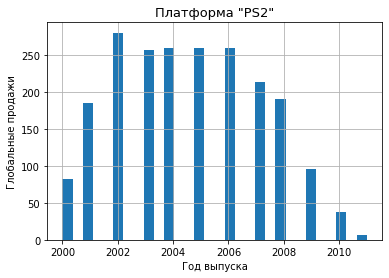

In [30]:
data.loc[data['platform'] == 'PS2', 'year_of_release'].hist(bins=30);
plt.title('Платформа "PS2"', fontsize=13)
plt.xlabel('Год выпуска', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10);

Рост продаж: 2000-2002 (2 года)\
Пиковое значение: 2002-2006 (4 года)\
Снижение продаж: 2006-2010 (4 года)

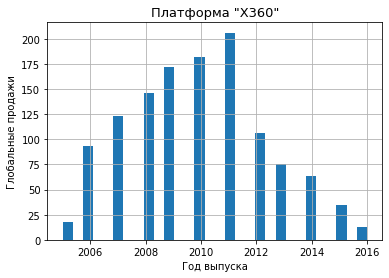

In [31]:
data.loc[data['platform'] == 'X360', 'year_of_release'].hist(bins=30);
plt.title('Платформа "X360"', fontsize=13)
plt.xlabel('Год выпуска', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10);

Рост продаж: 2006-2011 (5 лет)\
Пиковое значение: 2011 (1 год)\
Снижение продаж: 2011-2016 (5 лет)

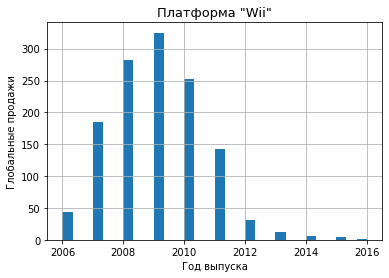

In [32]:
data.loc[data['platform'] == 'Wii', 'year_of_release'].hist(bins=30);
plt.title('Платформа "Wii"', fontsize=13)
plt.xlabel('Год выпуска', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10);

Рост продаж: 2006-2009 (3 года)\
Пиковое значение: 2009 (1 год)\
Снижение продаж: 2009-2012 (3 года)

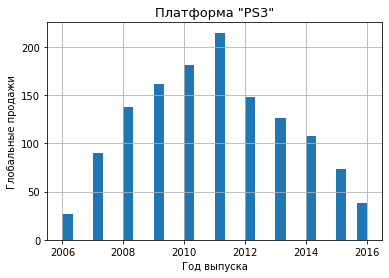

In [33]:
data.loc[data['platform'] == 'PS3', 'year_of_release'].hist(bins=30);
plt.title('Платформа "PS3"', fontsize=13)
plt.xlabel('Год выпуска', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10);

Рост продаж: 2006-2011 (5 лет)\
Пиковое значение: 2011 (1 год)\
Снижение продаж: 2011-2016 (5 лет)

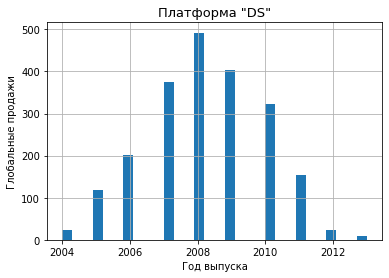

In [34]:
data.loc[data['platform'] == 'DS', 'year_of_release'].hist(bins=30);
plt.title('Платформа "DS"', fontsize=13)
plt.xlabel('Год выпуска', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10);

Рост продаж: 2004-2008 (4 года)\
Пиковое значение: 2008 (1 год)\
Снижение продаж: 2008-2012 (4 года)

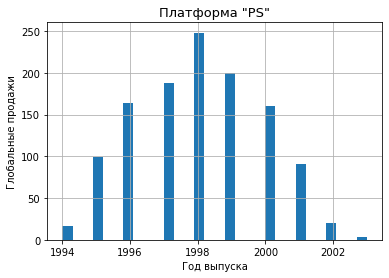

In [35]:
data.loc[data['platform'] == 'PS', 'year_of_release'].hist(bins=30);
plt.title('Платформа "PS"', fontsize=13)
plt.xlabel('Год выпуска', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10);

Рост продаж: 1994-1998 (4 года)\
Пиковое значение: 1998 (1 год)\
Снижение продаж: 1998-2002 (4 года)

На всех платформах можно выявить закономерность - количество выпущенных игр начинается с определённого значения, растёт, достигает своего пика, затем постепенно падает и приходит к минимуму или низким значениям. Такой цикл длится для всех платформ около 8-10 лет. Можно предположить, что за срок 8-10 лет появляются новые и исчезают старые платформы.

**3) Определим актуальный период**

Рассмотрим гистограммы платформ с наибольшим количеством продаж. Платформы после начала роста продаж достигли своего пика через:
- Платформа 'PS2' - 2 года
- Платформа 'X360' - 5 лет
- Платформа 'Wii' - 3 года
- Платформа 'PS3' - 5 лет
- Платформа 'DS' - 4 года
- Платформа 'PS' - 4 года

В среднем платформы достигали своего пика за 3.8 года, т.е. примерно за это время ситуация на рынке кардинально менялась. Из этого следует, что актуальный период составляет примерно 4 года.\
Т.е. для того, чтобы построить прогноз на 2017 год, нужно рассматривать данные за 3-4 предыдущих года - за 2013-2016 годы. Учитывая то, что данные за 2016 неполные, рассмотрим период с 2013 по 2015 годы.

In [36]:
data_actual = data.query('year_of_release >= 2013')

Для рассмотрения данных только за актуальный период, выделим эту часть датафрейма.

**4) Определим лидирующие по продажам, растущие или падающие платформы.Выберем несколько потенциально прибыльных платформ.**

In [37]:
data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Рассмотрим общие продажи платформ в 2013-2015 годах. Можно разделить платформы на 4 сегмента в зависимости от их показателей.
1) **Лидирующая платформа**: заметно отрывается от остальных платформ по общим продажам платформа 'PS4'.\
2) **Платформы с высокими показателями**: после неё идут платформы 'PS3', 'X360', '3DS', 'XOne' с высокими показателями.\
3) **Платформы со средними и низкими показателями**: платформы 'WiiU', 'PC', 'PSV'  отстают от лидирующих с заметным отрывом.\
4) **Платформы с низкими показателями**: 'Wii', 'PSP', 'DS'.

In [38]:
platforms_2013_2015 = data_actual.query('year_of_release >= 2013 & year_of_release <= 2015')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
platforms_2013_2015

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


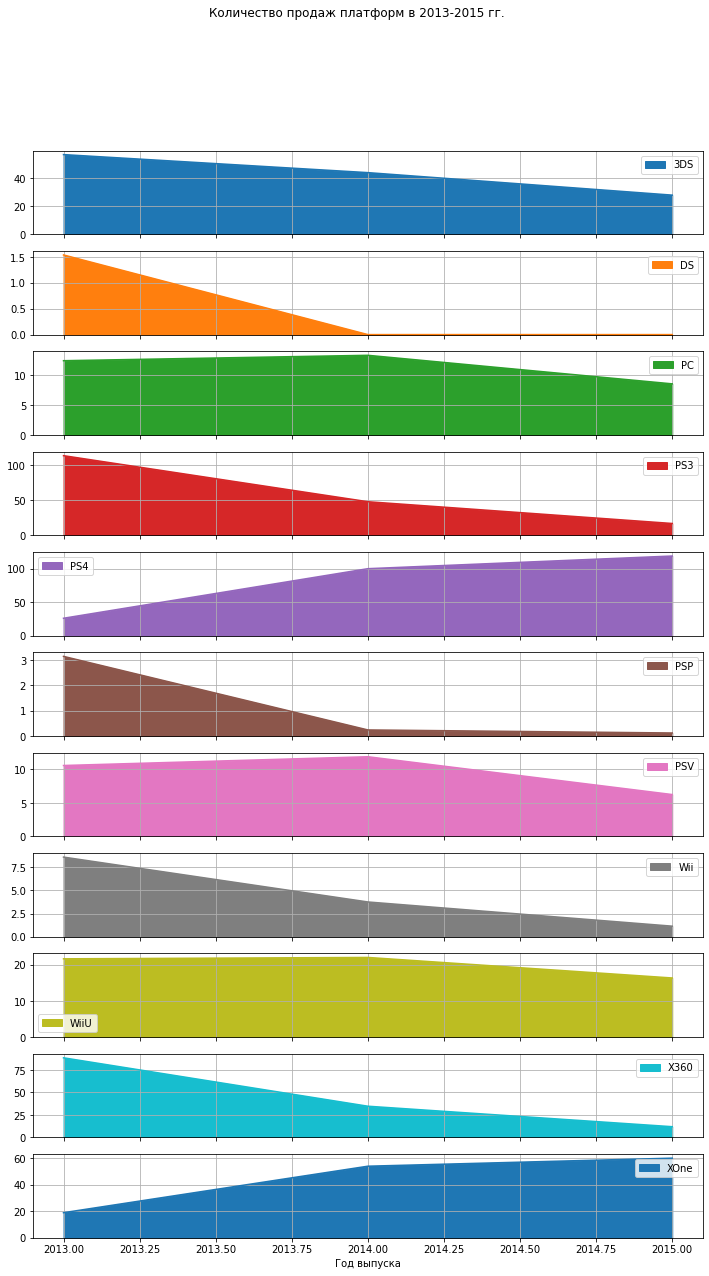

In [39]:
platforms_2013_2015.plot(y=['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'],\
                    kind='area', grid=True, figsize=(12, 20), title = 'Количество продаж платформ в 2013-2015 гг.',\
                         subplots=True);
plt.xlabel('Год выпуска', fontsize=10);

Рассмотрим графики общих продаж разных платформ по годам. Можно заметить, что некоторые платформы имеют отрицательную тенденцию, так как уже преодолели свой пик наивысших показателей общих продаж. Рассмотрим платформы по выделенным сегментам:

1) **Продажи платформы 'PS4'** постепенно идут на повышение.

2) **Платформы с высокими показателями**: 'PS3', 'XOne', '3DS', 'X360'.
- платформа 'PS3' имеет очень низкие показатели продаж
- платформа 'XOne' - продажи постепенно идут на повышение
- платформа '3DS' - продажи медленно снижаются
- платформа 'X360' имеет очень низкие показатели продаж

3) **Платформы со средними показателями**: 'WiiU', 'PC', 'PSV'.
- платформа 'WiiU' - продажи медленно снижаются
- платформа 'PC' - продажи медленно снижаются
- платформа 'PSV' - продажи медленно снижаются

4) **Платформы с низкими показателями**: 'Wii', 'PSP', 'DS'.
- платформа 'Wii' - показатели продаж, близкие к нулю
- платформа 'PSP' - показатели продаж, близкие к нулю
- платформа 'DS' - показатели продаж, близкие к нулю

**Потенциально прибыльные платформы**:

1) По причине возрастания показателей:
- платформа 'PS4'
- платформа 'XOne'

2) По причине стабильности:
- платформа '3DS' - т.к. продажи снижаются медленно, можно сказать, что платформа имеет относительно стабильные показатели продаж. Платформа имеет относительно среднюю стабильность и относительно высокие показатели
- платформа 'PC' - имеет относительно среднюю стабильность и относительно средние показатели
- платформа 'WiiU' - имеет относительно высокую стабильность, но относительно низкие показатели
- платформа 'PSV' - имеет относительно высокую стабильность, но относительно низкие показатели

**5) Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

In [40]:
data_top = data_actual.query('platform in ["3DS", "DS", "PC", "PS3", "PS4", "PSP", "PSV", "Wii", "WiiU", "X360", "XOne"]')

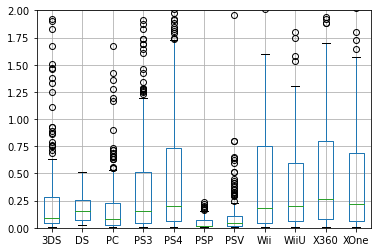

In [41]:
plt.ylim(0, 2)
data_top.pivot_table(index=data_top.index, values='total_sales', columns='platform').boxplot();

(0.0, 2.0)

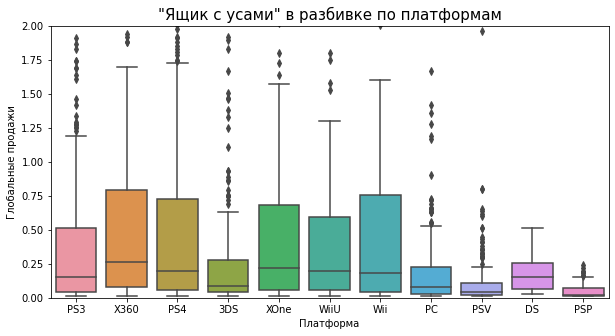

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data_actual, x='platform', y='total_sales')
plt.title('"Ящик с усами" в разбивке по платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10)
plt.ylim(0,2)

In [43]:
data['total_sales'].isna().sum()

0

Графики "ящик с усами" для разных платформ заметно отличаются. Можно заметить отличия в *размахе значений* и *количестве выбросов*.\
Размах значений - можно предположить, что чем больше размах нормальных значений, тем большее количество стабильных продаж имеет платформа.\
Количество выбросов - чем больше количество выбросов, тем более нестабильное количество продаж имеет платформа.

**6) Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.**

Рассмотрим платформу 'XOne', т.к. она имеет относительно стабильный высокий доход.

In [44]:
user_critic_sales_xone = data_actual.query('platform == "XOne"')\
.pivot_table(index=data_actual.query('platform == "XOne"').index,\
                                   values=['user_score', 'critic_score', 'total_sales'])

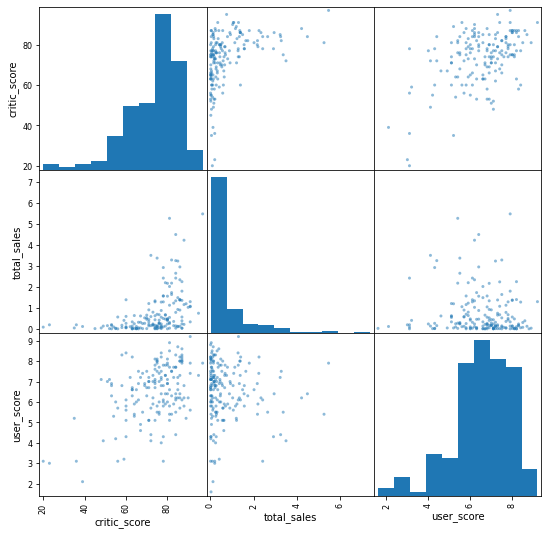

In [45]:
pd.plotting.scatter_matrix(user_critic_sales_xone, figsize=(9, 9));

Рассмотрим зависимость общих продаж от оценок критиков и пользователей - рассмотрим средний ряд диаграммы рассеяния по горизонтали.
1) В первой ячейке можно увидеть зависимость количества продаж от оценки критиков. До оценки 70 значения имеют вид постепенно расширяющейся полосы, после оценки 70 значения идут вразброс. Это значит, что до оценки 70 продажи напрямую зависят от оценки критиков - чем выше оценка, тем больше продаж. У игр с оценкой 70+ можно заметить выбивающиеся большие значения общих продаж, которые нельзя было заметить с у игр оценкой ниже.

2) В третьей ячейке можно увидеть зависимость количества продаж от оценки пользователей. Аномально высокие значения продаж есть у игр с оценкой больше 3, их количество возрастает с увеличением оценки пользователей. Количество невыбивающихся значений тоже возрастает с увеличением оценки пользователей.

Скорее всего, продажи игр и оценки критиков находятся в большей зависимости, чем оценки пользователей. Тем не менее, оценка пользователей тоже влияет на продажи.

In [46]:
user_critic_sales_xone

,critic_score,total_sales,user_score
99,NaN,7.39,NaN
165,97.0,5.47,7.9
179,81.0,5.26,5.4
242,84.0,4.49,6.4
270,88.0,4.22,6.2
...,...,...,...
16630,63.0,0.01,8.2
16643,NaN,0.01,6.6
16645,NaN,0.01,NaN
16660,74.0,0.01,6.7


In [47]:
print('Корреляция оценки критиков и продаж: ', user_critic_sales_xone['critic_score']\
      .corr(user_critic_sales_xone['total_sales']))
print('Корреляция оценки пользователей и продаж: ', user_critic_sales_xone['user_score']\
      .corr(user_critic_sales_xone['total_sales']))

Корреляция оценки критиков и продаж:  0.4169983280084017
Корреляция оценки пользователей и продаж:  -0.06892505328279414


Рассчитаем корреляцию между оценкой критиков и общими продажами и оценкой пользователей и общими продажами.\
Корреляция между оценкой критиков и общими продажами: 0,42.\
Корреляция между оценкой пользователей и общими продажами: -0,06.\
Как и предполагалось, оценка критиков имеет гораздо большее влияние на продажи, чем оценка пользователей. Более того, оценка пользователей отрицательна и близка к нулю.

Выводы:
- Можно заметить, что с преодолением порога оценки критиков примерно 70 баллов, продажи перестают быть предсказуемыми. Исходя из этого, можно предположить, что игры с оценкой 70+ относятся к одной категории игр с высокой оценкой критиков. Игры, входящие в эту категорию, не имеют сильных различий и преимуществ за счёт оценки критиков, и на продажи начинают влиять другие факторы.

**7) Соотнесём выводы с продажами игр на других платформах.**

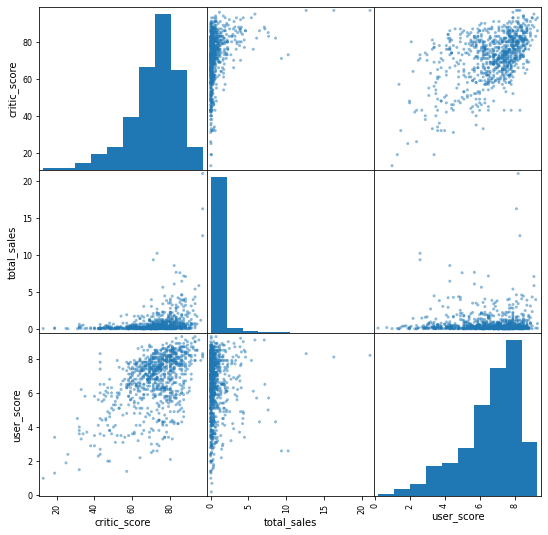

In [48]:
user_critic_sales = data_actual.query('platform != "XOne"')\
.pivot_table(index=data_actual.query('platform != "XOne"').index, values = ['user_score', 'critic_score', 'total_sales'])
pd.plotting.scatter_matrix(user_critic_sales, figsize=(9, 9));

In [49]:
print('Корреляция оценки критиков и продаж: ', user_critic_sales['total_sales'].corr(user_critic_sales['critic_score']))
print('Корреляция оценки пользователей и продаж: ', user_critic_sales['total_sales'].corr(user_critic_sales['user_score']))

Корреляция оценки критиков и продаж:  0.30193777746503586
Корреляция оценки пользователей и продаж:  0.0048989099197678755


Рассчитаем корреляцию между оценкой критиков и общими продажами и оценкой пользователей и общими продажами, исключив из расчёта платформу XOne.\
Корреляция между оценкой критиков и общими продажами: 0,31. На платформе 'X360' корреляция равна 0,42.\
Корреляция между оценкой пользователей и общими продажами: -0,003. На платформе 'X360' корреляция равна -0,06.\
Оценка критиков на всех платформах имеет ощутимое влияние на продажи.

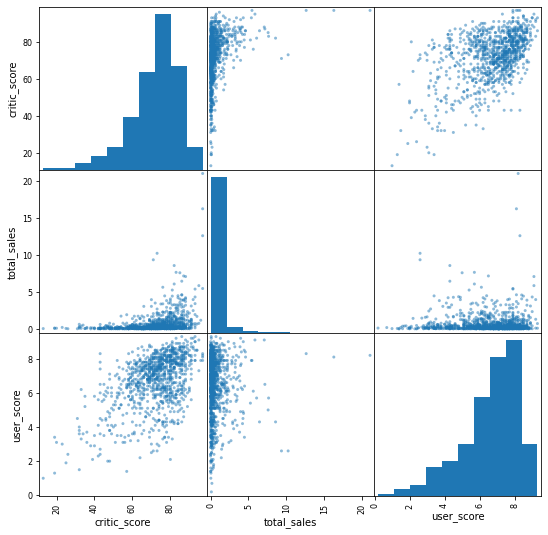

In [50]:
user_critic_sales = data_actual.pivot_table(index=data_actual.index, values = ['user_score', 'critic_score', 'total_sales'])
pd.plotting.scatter_matrix(user_critic_sales, figsize=(9, 9));

Рассмотрим второй ряд ячеек по горизонтали в матрице рассеяния:
1) Рассмотрим первую ячейку - зависимость количества продаж от оценки критиков. Выбивающиеся большие значения продаж начинаются с оценки 60 баллов, и их количество увеличивается с ростом оценки критиков. Начиная с оценки примерно 70 баллов, количество продаж становится непредсказуемым. Похожая схема присутствует в продажах платформы 'X360'. При этом корреляция зависимости продаж всех платформ от оценки критиков ниже, чем корреляция продаж и оценок игр платформы 'X360'.

2) Рассмотрим третью ячейку - зависимость количества продаж от оценки пользователей. Количество продаж растёт с увеличением оценки пользователей, но корреляция очень низкая. Можно заметить, что выбивающиеся высокие значения продаж появляются с оценки 2,5 балла, почти так же, как у платформы 'X360'. Корреляция продаж и оценки пользователей по всем платформам немного ниже, чем у платформы 'X360', но примерно на том же уровне.

**Вывод:**
- Можно предположить, что так же, как у платформы 'X360', у других платформ тоже есть категория игр с высокими оценками критиков, на продажи которых сильнее действуют другие факторы.

**8) Посмотрим на общее распределение игр по жанрам. Рассмотрим самые прибыльные жанры. Выясним, выделяются ли жанры с высокими и низкими продажами.**

In [51]:
data_actual.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64

Рассмотрим распределение игр по жанрам - посчитаем их количество в каждом жанре:

1) наибольшее количество игр в жанре 'Action' - больше 700

2) среднее количество игр - от 100 до 300 - в жанрах: 'Role-Playing', 'Adventure', 'Sports', 'Shooter', 'Misc'

3) наименьшее количество игр - меньше 100 - в жанрах: 'Racing', 'Fighting', 'Platform', 'Simulation', 'Strategy, 'Puzzle'


In [52]:
data_actual.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64

Рассмотрим прибыльность жанров. Для каждого жанра рассчитаем медианное значение продаж, т.к. оно показывает количество продаж в среднем без учёта аномальных значений, которых, как было видно из матрицы рассеяния, достаточно много. Можно выделить несколько групп.

1) наиболее прибыльный жанр - 'Shooter'

2) жанры со средней прибыльностью - 'Sports', 'Platform', 'Role-Playing', 'Fighting', 'Action', 'Racing'

3) жанры с наименьшей прибыльностью - 'Simulation', 'Misc', 'Strategy', 'Puzzle', 'Adventure'

**Таким образом, мы:**
- определили актуальный период
- определили потенциально прибыльные платформы
- определили влияние оценки пользователей и оценки критиков на продажи
- нашли наиболее прибыльные жанры

### Составьте портрет пользователя каждого региона

**1) Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж.**

In [53]:
top_platforms_na = data_actual.pivot_table(index='platform', values='na_sales',\
                                 aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

top_platforms_na['part_na'] = top_platforms_na['na_sales'] / data_actual['na_sales'].sum() * 100
top_platforms_na = top_platforms_na.drop(columns='na_sales')

In [54]:
top_platforms_eu = data_actual.pivot_table(index='platform', values='eu_sales',\
                                 aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

top_platforms_eu['part_eu'] = top_platforms_eu['eu_sales'] / data_actual['eu_sales'].sum() * 100
top_platforms_eu = top_platforms_eu.drop(columns='eu_sales')

In [55]:
top_platforms_jp = data_actual.pivot_table(index='platform', values='jp_sales',\
                                 aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

top_platforms_jp['part_jp'] = top_platforms_jp['jp_sales'] / data_actual['jp_sales'].sum() * 100
top_platforms_jp = top_platforms_jp.drop(columns='jp_sales')

In [56]:
top_platforms_na.merge(top_platforms_eu, on='platform', how='outer').merge(top_platforms_jp, on='platform', how='outer')\
.style.background_gradient('coolwarm')

,part_na,part_eu,part_jp
platform,,,
PS4,24.842933,35.971241,11.336838
XOne,21.274360,13.152997,nan
X360,18.656188,10.840578,nan
PS3,14.507322,17.288326,16.586163
3DS,8.727239,7.893328,48.167353
PSV,nan,nan,13.205001
WiiU,nan,nan,7.728371


Построим таблицу долей продаж платформ в разных регионах. Можно заметить, что в Северной Америке и Европе пользователи в предпочитают в основном похожие платформы. В Японии предпочитают совершенно другие платформы.

1) **Северная Америка**: распределение долей продаж по платформам убывает постепенно, без сильных разрывов в значениях\
2) **Европа**: сильно отрывается от остальных платформа 'PS4', после неё на относительно одном уровне распределяются продажи других платформ\
3) **Япония**: очень сильно отрывается от остальных платформа '3DS', занимая почти половину всех продаж, после неё на относительно одном уровне распределяются продажи других платформ

**2) Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5) и поясним разницу.**

In [57]:
top_genres_na = data_actual.pivot_table(index='genre', values='na_sales',\
                                 aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

top_genres_na['part_na'] = top_genres_na['na_sales'] / data_actual['na_sales'].sum() * 100
top_genres_na = top_genres_na.drop(columns='na_sales')

In [58]:
top_genres_eu = data_actual.pivot_table(index='genre', values='eu_sales',\
                                 aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

top_genres_eu['part_eu'] = top_genres_eu['eu_sales'] / data_actual['eu_sales'].sum() * 100
top_genres_eu = top_genres_eu.drop(columns='eu_sales')

In [59]:
top_genres_jp = data_actual.pivot_table(index='genre', values='jp_sales',\
                                 aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

top_genres_jp['part_jp'] = top_genres_jp['jp_sales'] / data_actual['jp_sales'].sum() * 100
top_genres_jp = top_genres_jp.drop(columns='jp_sales')

In [60]:
top_genres_na.merge(top_genres_eu, on='genre', how='outer').merge(top_genres_jp, on='genre', how='outer')\
.style.background_gradient('coolwarm')

,part_na,part_eu,part_jp
genre,,,
Action,28.797606,30.117533,28.761188
Shooter,25.071394,22.400122,4.695269
Sports,14.911700,15.429722,nan
Role-Playing,10.600626,9.425592,36.255150
Misc,6.280414,nan,6.535019
Racing,nan,5.147490,nan
Fighting,nan,nan,5.434011


Построим таблицу долей продаж игр разных жанров. Можно заметить:
- Самый популярный жанр в Северной Америке и Европе - 'Action'
- Самый популярный жанр в Японии - 'Role-Playing'
- Популярные жанры в Северной Америке и Европе - 'Sports' и 'Shooter'
- Жанры, которые популярны во всех регионах - 'Action', 'Sports' и 'Misc'

**Выводы:**
В Японии с большим отрывом занимает большую долю продаж игры жанр 'Role-Playing'. В Северной Америке и Европе большую долю продаж занимает жанр 'Action', но не с таким большим отрывом, как 'Role-Playing' в Японии.\
В Северной Америке и Европе можно выделить скорее группу жанров, - 'Action', 'Sports', 'Shooter' - занимающих бОльшую часть продаж. Можно предположить, что в группе жанров, лидирующих в Северной Америке и Европе, есть общая характеристика, удовлетворяющая вкусы большинства пользователей. В Японии очевидно лидирует только один жанр, не имеющий аналогов и, скорее всего, обладающий характеристикой, отсутствующей в других жанрах. Возможно, эта характеристика - наличие сюжета.

**3) Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.**

In [61]:
rating_na = data_actual.pivot_table(index='rating', values='na_sales',\
                                 aggfunc='sum').sort_values(by='na_sales', ascending=False)
rating_na['part_na'] = rating_na['na_sales'] / data_actual['na_sales'].sum() * 100
rating_na = rating_na.drop(columns='na_sales')

In [62]:
rating_eu = data_actual.pivot_table(index='rating', values='eu_sales',\
                                 aggfunc='sum').sort_values(by='eu_sales', ascending=False)
rating_eu['part_eu'] = rating_eu['eu_sales'] / data_actual['eu_sales'].sum() * 100
rating_eu = rating_eu.drop(columns='eu_sales')

In [63]:
rating_jp = data_actual.pivot_table(index='rating', values='jp_sales',\
                                 aggfunc='sum').sort_values(by='jp_sales', ascending=False)
rating_jp['part_jp'] = rating_jp['jp_sales'] / data_actual['jp_sales'].sum() * 100
rating_jp = rating_jp.drop(columns='jp_sales')

In [64]:
rating_na.merge(rating_eu, on='rating', how='outer').merge(rating_jp, on='rating', how='outer')\
.style.background_gradient('coolwarm')

,part_na,part_eu,part_jp
rating,,,
M,37.744169,37.049690,10.022731
unknown,20.429051,20.118298,60.413411
E,18.059903,21.252836,10.754369
E10+,12.391766,10.883920,4.183833
T,11.375111,10.695255,14.625657


Построим таблицу долей продаж игр по рейтингам. Распределение продаж игр по рейтингам примерно одинаково у Северной Америки и Европы. Самую большую долю продаж в Северной Америке и Европе занимает категория М, в Японии самую большую долю продаж занимают игры без рейтинга.

Как мы выяснили, в Северной Америке и Европе больше всего предпочитают жанр Action, а в Японии - Role-Playing. Это может объяснять разницу в продажах игр в разных возрастных категориях, т.к. жанр Action предназначен в основном для взрослой аудитории, а в играх Role-Playing такой связи нет.

*Построим таблицу долей продаж игр по рейтингам. Распределение продаж игр по рейтингам примерно одинаково у всех регионов с относительно небольшими отличиями, кроме одной категории - рейтинга 'M'. В Северной Америке и Европе доля продаж игр с этим рейтингом примерно в 4-5 раз больше, чем в Японии. Количество продаж с рейтингом 'M', находящимся на третьем месте по величине, намного меньше, чем количество продаж с рейтингом 'T', находящимся на втором месте по величине, при этом в данных по продажам в Северной Америке и Европе такого разрыва нет.\
Самую большую долю занимают продажи игр с рейтингом 'E', далее по убывающей располагаются продажи игр с рейтингами 'T', 'M' и так далее.*

**Вывод:**
*Рейтинг ESRB влияет на продажи во всех регионах. В Японии сильнее, чем в Северной Америке и Европе, на продажи влияет рейтинг 'M'.*

**Таким образом, мы:**
- определили наиболее предпочтительные платформы для пользователя каждого региона
- определили наиболее предпочтительные жанры для пользователя каждого региона
- определили влияние возрастной категории игр на продажи

### Проверьте гипотезы

**1) Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем нулевую (H_0) и альтернативую (H_a) гипотезы:

H_0: рейтинг 'Xbox One' = рейтинг 'PC'\
H_a: рейтинг 'Xbox One' != рейтинг 'PC'

Для проверки гипотезы используем t-тест для двух независимых выборок и проверим равенство средних.

In [65]:
xone_platform = data_actual.query('platform == "XOne"')['user_score'].dropna()
pc_platform = data_actual.query('platform == "PC"')['user_score'].dropna()

results = st.ttest_ind(xone_platform, pc_platform, equal_var=False)

alpha = 0.01

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Т-тест показал, что отвергнуть нулевую гипотезу не получилось. Это значит, что мы можем допустить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, т.е. гипотеза верна.

**2) Проверим гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.**

Сформулируем нулевую (H_0) и альтернативую (H_a) гипотезы:

H_0: рейтинг 'Action' = рейтинг 'Sports'\
H_a: рейтинг 'Action' != рейтинг 'Sports'

In [66]:
xone_genre = data_actual.query('genre == "Action"')['user_score'].dropna()
pc_genre = data_actual.query('genre == "Sports"')['user_score'].dropna()

results = st.ttest_ind(xone_genre, pc_genre, equal_var=False)

alpha = 0.01

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Т-тест показал, что отвергнуть нулевую гипотезу получилось. Это значит, что мы можем допустить, что средние пользовательские рейтинги жанров Action и Sports разные, т.е. гипотеза верна.

**Таким образом, мы:**
- определили, что можем допустить то, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы
- определили, что можем допустить то, что средние пользовательские рейтинги жанров Action и Sports разные

### Напишите общий вывод

**Выводы:**
- Нужно обращать внимание на отзывы критиков, т.к. они влияют на продажи, отзывы пользователей не так важны
- Наиболее предпочтительна для продаж в в Северной Америке и Европе платформа PS4, в Японии - 3DS
- Намые популярные жанры в Северной Америке и Европе - Action, в Японии - Role-Playing

**Предположения:**
- В группе жанров, лидирующих в Северной Америке и Европе, есть общая характеристика, удовлетворяющая вкусы большинства пользователей
- В Японии очевидно лидирует только один жанр, не имеющий аналогов и, скорее всего, обладающий характеристикой, отсутствующей в других жанрах. Возможно, эта характеристика - наличие сюжета.